# Introducrtion to Machine Learning: Assignment #2
## Submission date: 21\02\2024, 23:59.
### Topics:
- Perceptron
- Logistic Regression
- Gradient Descent
- SVM
- Kernels

Submitted by:

 Or Dinar 207035809

**Assignment Instruction:**

· Submissions in pairs only.

· The code must be reasonably documented

· Try to keep the code as clean, concise, and short as possible

· Your submission must be entirely your own. Any attempts of plagiarism (including ChatGPT) will lead to disciplinary actions.

· You should save a copy of the notebook to your Drive and answer all the questions inside the notebook, at the designated cells. Only the notebook will be submitted in moodle (in `.ipynb` format).

· If you wish to work in your IDE, make a `.py` copy of the notebook, but as you finish insert the script back to the matching cells of the notebook.

**Important:** All plots, results and outputs should be included in the notebook as the cells' outputs (run all cells and do not clear the output).

<b>Note:</b> Pay attention to the labels in the the different datasets (0/1) and that some of the learned algorithms work with labels (-1/1).

## Question 1 - Logistic regression

You will implement a claaisifer to predict wether client will buy a SUV car or not. <br/>
The prediction will be done by the client's age, gender and salary. <br/>
The label is 1 when bought and 0 otherwise.

import libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

plotting function

In [3]:
from mpl_toolkits.mplot3d import Axes3D

def plot(data, labels, w, bias):

  a, b, c = w[0], w[1], w[2]
  d = bias

  # create a 3D scatter plot
  fig = plt.figure()
  ax = fig.add_subplot(111, projection='3d')
  ax.scatter(data[:, 0], data[:, 1], data[:, 2], c=labels, cmap='coolwarm')

  xx, yy = np.meshgrid(range(-2, 2), range(-2, 2))
  z = (-a * xx - b * yy - d) * 1.0 / c

  ax.plot_surface(xx, yy, z, alpha=0.4)
  ax.azim += 30
  ax.elev += 10
  #ax.view_init(elev=0, azim=90, roll=45)

  # customize the plot
  ax.set_xlabel('X')
  ax.set_ylabel('Y')
  ax.set_zlabel('Z')
  plt.title('3D Scatter Plot with 2D Labels')
  plt.show()

Read the dataset and visualize it

In [4]:
df = pd.read_csv('https://sharon.srworkspace.com/ml/datasets/hw2/suv_data.csv')
df.head(3)

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0


After looking at the data, drop irrelevant features (such that have no learnability meaning) and make sure your remaining features are numeric.



In [ ]:
# remove userID, it has no value in the classification
df = df.drop(['User ID'], axis=1)
# replace categorical values with discrete binary values for gender
genders = ['Male','Female']
for idx, gender in enumerate(genders):
  df['Gender'] = df['Gender'].replace({gender: idx})

Plot on the densities of the features, choose the scaler we will be using.<br/>
<font color='red'>Write here your answer and explain it</font>

In [ ]:
from sklearn.model_selection import train_test_split
# Implement here

Split the data into 80% train samples and 20% test samples, with random state 42. <br/>
Split the train into real train (70%) and validation (30%) with random state 42. <br/>
Apply the scaler on the train, validation and test sets. <br/>
Remember: when scaling the test, it should use all the training data.<br/>
Tip: For minimizing the loss function, what labels did we look at? Are they the same here?

In [ ]:
# Import scaling library
# Implement here

Implement the function Logistic_Regression_via_GD(P,y,lr):
-	Input: an np array ‘P’ of ‘n’ rows and ‘d’ columns, a label vector ‘y’ of ‘n’ entries and learning rate parameter ‘lr’.
-	Output: The function computes the output vector ‘w’ (and ‘b’) which minimzes the logistic regression cost function on ‘P’ and ‘y’. <br/>

The implementation should be fully yours. Don't use library implementation! <br/>
It should be done by implementing Gradient descent (with ‘lr’ as the learning rate) to solve logistic regression. <br/>

Tip: The gradients may be large, you can use $\frac{1}{n}\nabla{L}$ (which is the true empirical loss' gradient)



In [ ]:
def sigmoid(z):
  return 1/(1+np.exp(-z))

# For now, ignore the lambda, you will need it later
def Logistic_Regression_via_GD(P,y,lr,lamda = 0):
  # Implement here

Implement the function Predict(w,b,p):
-	Input: an input vector x which represents a sample, a vector (numpy) ‘w’ and a number ‘b’.
-	Output: the class prediction for ‘p’ of the logistic regression model defined by ‘w’ and ‘b’.

Note: It is your choice if use predictions of 1/-1 or 1/0. Make sure to adjust your choice to the true labels (for comparison).

In [ ]:
def predict(x,w,b):
  # Implement here

Call ‘Logistic_Regression_via_GD(P,y,lr)’, where ‘P’ and ‘y’ are the training data and the corresponding labels. <br/>
Try to find the best lr for the learning task.

In [ ]:
# Implement here

Run the model on the test data, print the accuracy and plot hyperplane on the <u>test data</u> using ‘plot’ as defined above.

In [ ]:
# Implement here

To improve generalization, we use a tool that is called regularization. <br/>
In simple words,
$L_{\text{loss}}(w)=L_{\text{logistic-reg}}(w)+λ⋅‖w‖^2$. <br/>
Change ‘Logistic_Regression_via_GD’ according to that loss and find the best hyperparameter $λ$ using the performance on the <u>validation</u>.


In [ ]:
lamads = np.arange(0, 5, 0.1)
for lamda in lamads:
  #Solve logistic regression with lamda
  print(f"Valdation accuracy for lamda={lamda:.2f}: {accuracy * 100}%")

Print final test accuracy

In [ ]:
# Implement here
print(f"Test accuracy: {accuracy * 100}%")

## Question 2 - SVM

You are given dataset for binary classification in 2D and aim to build the best SVM classifier.

import libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC

load npy file

In [2]:
import requests
from io import BytesIO

def load_npy_file(url):
  response = requests.get(url)
  if response.status_code == 200:
    npy_data = np.load(BytesIO(response.content), allow_pickle=True).item()
    return npy_data
  else:
    return None

load the data

In [3]:
data_dict = load_npy_file('https://sharon.srworkspace.com/ml/datasets/hw2/svm_data_2d.npy')

# Access the data as needed
X_train = data_dict['X_train']
y_train = data_dict['y_train']
X_val = data_dict['X_val']
y_val = data_dict['y_val']

Look at the plot of the training data. <br/>
What _geometric_ shape could (almost) perfectly separate the data?<br/>
<font color='aqua'>You could draw an ellipse that would seperate the data with good precision.</font>

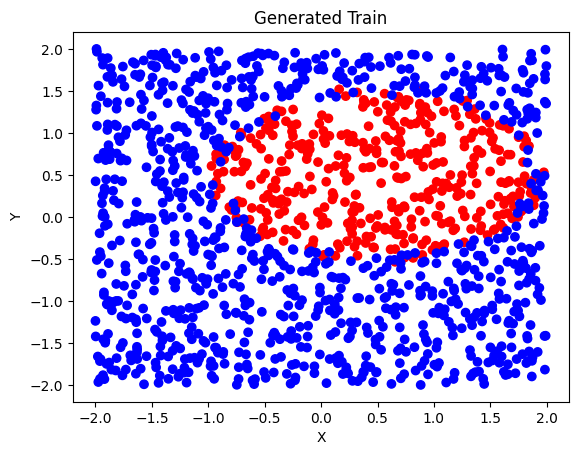

In [4]:
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap='bwr')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Generated Train')
plt.show()

Now, we want to separate the data using ellipsoid. <br/>
Its equation is:
$$Ax^2+By^2+Cx+Dy+e=0$$
Based on that equation, construct a mapping function into 4d space, such that the problem will become a linear ($w^t ϕ(x)+e=0$). <br/>
After the mapping, learn a linear classifier and print the hyperplane equation.<br/>
Note: after getting an output, I would recommend you to plot this equation on desmos, just to "see it".

In [ ]:
new_features = # Implement here

model = SVC(kernel='linear', C=10)
model.fit(new_features, y_train)

# Get the hyperplane equation coefficients and intercept
coefficients = model.coef_[0]
intercept = model.intercept_

# Print the hyperplane equation
equation_parts = []
for i in range(len(coefficients)):
    equation_parts.append(f"({coefficients[i]:.3f} * X{i+1})")
equation = " + ".join(equation_parts) + f" + ({intercept[0]:.3f})"

print("Hyperplane equation:")
print(f"  {equation}")

Complete the missing lines to get plots on train and test

In [ ]:
train_features = # Implement here
train_preds = # Implement here
train_acc = # Implement here

val_features = # Implement here
val_preds = # Implement here
val_acc = # Implement here

xx, yy = np.meshgrid(np.arange(-2, 2.2, 0.1), np.arange(-2, 2.2, 0.1))
data = np.c_[xx.ravel(), yy.ravel()]

new_features = # Implement here the new features on 'data'
Z = # Implement here the predictions of data into 2 classes, using w, b you found
Z = Z.reshape(xx.shape)

fig, axs = plt.subplots(1, 2, figsize=(12, 4))

# Plot the training data on the first subplot
axs[0].contourf(xx, yy, Z, alpha=0.8)
scatter1 = axs[0].scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap='bwr')
axs[0].set_xlabel('X')
axs[0].set_ylabel('Y')
axs[0].set_title(f'Train dataset - {train_acc:.4f} accuracy')

# Plot the validation data on the second subplot
axs[1].contourf(xx, yy, Z, alpha=0.8)
scatter2 = axs[1].scatter(X_val[:, 0], X_val[:, 1], c=y_val, cmap='bwr')
axs[1].set_xlabel('X')
axs[1].set_ylabel('Y')
axs[1].set_title(f'Validation dataset - {val_acc:.4f} accuracy')

plt.show()

You will try also two other kernels:
  - kernel='poly', degree=4, C=10.
  -	kernel='rbf', gamma=1.5, C=10.

Based on those two models, along with the ellipsoid, which model generalizes the best? <br/>
<font color='red'>Write here your answer and explain it</font>

In [ ]:
from sklearn.svm import SVC

model = # Implement here
clf = model.fit(X_train, y_train)

xx, yy = np.meshgrid(np.arange(-2, 2.2, 0.1), np.arange(-2, 2.2, 0.1))
xy = np.c_[xx.ravel(), yy.ravel()]

P = model.decision_function(xy).reshape(xx.shape)

fig, axs = plt.subplots(1, 2, figsize=(12, 4))

# Plot the training data on the first subplot
axs[0].contourf(xx, yy, P, alpha=0.8)
scatter1 = axs[0].scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap='bwr')
axs[0].set_xlabel('X')
axs[0].set_ylabel('Y')
axs[0].set_title(f'Train dataset - {clf.score(X_train, y_train):.4f} accuracy')

# Plot the validation data on the second subplot
axs[1].contourf(xx, yy, P, alpha=0.8)
scatter2 = axs[1].scatter(X_val[:, 0], X_val[:, 1], c=y_val, cmap='bwr')
axs[1].set_xlabel('X')
axs[1].set_ylabel('Y')
axs[1].set_title(f'Validation dataset - {clf.score(X_val, y_val):.4f} accuracy')

plt.show()

In [ ]:
from sklearn.svm import SVC

model = # Implement here
clf = model.fit(X_train, y_train)

xx, yy = np.meshgrid(np.arange(-2, 2.2, 0.1), np.arange(-2, 2.2, 0.1))
xy = np.c_[xx.ravel(), yy.ravel()]

P = model.decision_function(xy).reshape(xx.shape)

fig, axs = plt.subplots(1, 2, figsize=(12, 4))

# Plot the training data on the first subplot
axs[0].contourf(xx, yy, P, alpha=0.8)
scatter1 = axs[0].scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap='bwr')
axs[0].set_xlabel('X')
axs[0].set_ylabel('Y')
axs[0].set_title(f'Train dataset - {clf.score(X_train, y_train):.4f} accuracy')

# Plot the validation data on the second subplot
axs[1].contourf(xx, yy, P, alpha=0.8)
scatter2 = axs[1].scatter(X_val[:, 0], X_val[:, 1], c=y_val, cmap='bwr')
axs[1].set_xlabel('X')
axs[1].set_ylabel('Y')
axs[1].set_title(f'Validation dataset - {clf.score(X_val, y_val):.4f} accuracy')

plt.show()

Use the validation dataset to tune better hyperparameter for rbf (gamma). Use C=10 as before.

In [ ]:
gammas = # Add gammas to your choice
accs = []

for gamma in gammas:
  # Implement here

plt.figure(figsize=(15,6))
plt.plot(gammas, accs, color='red')
plt.xlabel('gamma')
plt.ylabel('accuracy')
plt.title('Tuning')
plt.xticks(gammas)
plt.show()

Questions:
- Without coding, only from the plot, will the accuracy change using the best $\gamma$ you found? Why?
- Why did we use C=10? <br/>

<font color='red'>Write here your answer and explain it</font>

## Question 3 - Perceptron

You will implement perceptron via gradient descent.

The data set is taken from Andrew course on Coursera. The data consists of marks from two exams for 100 applicants and binary labels: 1 when applicant was admitted and 0 otherwise.

The objective is to build a classifier that can predict whether an application will be admitted to the university or not. We <u>will not</u> use test set, but only analyze the training.<br/>

The data is available here: https://sharon.srworkspace.com/ml/datasets/hw2/exams.csv

import libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display, clear_output

Load the data, plot it, and make sure you understand its shape.

In [ ]:
# Implement here

Prepare the data by scaling it into 0-1 range (via MinMaxScaler)

In [ ]:
# Import library
# Implement here

Implement the function perceptron(data, labels, lr) which gets the train data along with labels and returns the weight vector learned by perceptron. <br/>
Note: if you choose to use iterations, don’t use more than 10,000 iterations.<br/>



In [ ]:
def perceptron(data, labels, lr = 1):
  # Implement here

In [ ]:
def plot(train, labels, w, bias, show=True):
	# Create a figure and axis object
	fig, ax = plt.subplots()

	c0 = train[labels == -1]
	c1 = train[labels == 1]

	# Plot the data
	ax.scatter(c0[:,0], c0[:,1], c='red')
	ax.scatter(c1[:,0], c1[:,1], c='blue')

	a, b, c = w[0], w[1], bias

	# Compute the slope and y-intercept of the line
	m = -a / b
	b = -c / b

	# Generate some x values for the plot
	x = np.arange(np.min(train[:,0]), np.max(train[:,0]), 0.1)

	# Compute the corresponding y values using the equation of the line
	y = m * x + b

	# Plot the line
	plt.plot(x, y)

	# Add axis labels and title
	ax.set_xlabel('X-axis')
	ax.set_ylabel('Y-axis')

	preds = np.sign(np.dot(train, w)+bias)
	acc = np.count_nonzero(labels == preds) / len(labels)

	ax.set_title(f'Train accuracy is {acc}')
	ax.set_xlim(-0.1, 1.1)
	ax.set_ylim(-0.1, 1.1)

	if show:
		plt.show()

Call the perceptron and plot function with your data.

In [ ]:
# Implement here

Upgrade the "perceptron" function such that it will return array of weight vectors, from each iteration during the process. <br/>
Call the "plot_anim" function and wait untill you see approximate converge <br/>
- Do you really need many iterations?
- Does perceptron converge on this dataset? <br/>

<font color='red'>Write here your answer and explain it</font>

In [ ]:
ws = perceptron(...)    # Implement here

def plot_anim(ws):
  for ww in ws:
    plt.clf()
    plot(data, labels, ww[:-1], ww[-1], False)
    display(plt.gcf())
    clear_output(wait=True)  # Clear the previous plot

plot_anim(ws)

We will extend the theory of convergence in perceptron to non-separable case:
Let ${\{x_i\} }_{i=1}^n$ be the training set and $R$ such that $∀i:‖x_i ‖≤R$.<br/>
The deviation of each sample is defined by $d_i= \max \{0,1-y_i (w^t x_i) \}$. <br/>
Let $D=‖d‖$, then the number of mistakes of the perceptron algorithm is upper bounded by $2(R+D)^2$.<br/>
Use this theorem to find (much) smaller number of iterations, use that exact number as upper bound and <u>report the train accuracy</u>.
Did it improve?<br/>
<font color='red'>Write here your answer and explain it</font>


In [ ]:
# Implement here

Remark: actually, $$d_i=\max \{ 0,γ-y_i (w^t x_i ) \}$$ and the bound is $$\left(\frac{R+D}{\gamma}\right)^2$$ where $$γ=\min⁡ \{y_i w^t x_i\}$$
By better measurement of the radius, we can get an even better bound. Its it not required here though.